# Particle Diffusion Physics

NOTE: The following involves some advanced physics. If the reader is not familiar with the physics, it is our hope that at least the programming portion is understandable. Overall, our mission is to create a simulated model of interacting "particles", induce various conditions on them, and analyze their behavior. As we go through this project, the results should be understandable. Additionally, much of the exposition of the advanced physics borrows very heavily (at times copied verbatim) from lecture by Damien Benveniste in the PHYS 590 course at CSULB in Fall 2017. The code, however, is written by Jesus Lopez.

We are going to model particle diffusion. Specifically, we will assume (in accord with established physics) the probability distribution (PDF) of particle positions follows the dynamic of the diffusion equation with dimension $d$:

$$
\frac{\partial P(r,t)}{\partial t} = \frac{1}{r^{d-1}}\frac{\partial}{\partial r}\left(r^{d-1}K(r)\frac{\partial P(r,t)}{\partial r}\right)
$$
where $K(r)$ is the diffusivity (or the diffusion constant if independent of $r$ or $t$), $r=\sqrt{\sum_{i=1}^d x_i^2}$ is the norm of the position vector $\mathbf{r}=\left(\begin{matrix}
  x_1  \\
  x_2  \\
  \vdots  \\
  x_d
 \end{matrix}\right)$.
 
 $P(r,t)$ satisfies $$ \int_{0}^{\infty}r^{d-1}P(r,t) = 1. $$
as normalization condition. For sake of simplicity, we will consider only the $d=1$ case.

## Power law diffusity
Let's consider a power law diffusity:

$$ \ K(r) = Dr^{\alpha}, 0<\alpha <2 $$
This diffusivity induces a time evolution

$$
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
$$
where $\Gamma(x)$ is the gamma function and $\gamma=2-\alpha$. The PDF has a stretched-exponential distribution

$$
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
$$
with

$$\begin{eqnarray}
A=\left[\frac{\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}\right]^{\gamma/2}\\
B=\log\left[\gamma\frac{\Gamma\left(\frac{d+2}{\gamma}\right)^{d/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{(d+2)/2}}\right]
\end{eqnarray}$$
For sake of simplicity, we will consider only the $d=1$ and $\alpha=0$ case.

## Solving the diffusion equation using a Monte Carlo method
The above diffusion equation has an equivalent Ito stochastic differential equation

$$
dx = \sqrt{2K}dW
$$
with $W$ being a Wiener process or Brownian motion. We can numerically integrate the stochastic equations using the Euler-Maruyama scheme:

$$
x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T}
$$
where $\Delta T = T_n - T_{n-1}$ is a discretized time increment and $N_{T}$ is a standard normal random variable.

## Simulating to create our data
We write a function that generates particles paths under this diffusive dynamic. The output will be a data frame where each row represents a particle and each column a point in time. The values of this data frame represent a particle's position at a specific time point.

Let's summarize the steps we will take:

- Create a data frame with 1000 columns (each representing a point in time) and 100 rows (100 particles).
- Fill this data frame with "normal" noise in each cell using numpy.random.normal.
- Set the first column to 0 (start at $x=0$).
- Generate a cumulative sum of the columns (using the pandas function cumsum). In other words, for each particle for each point in time, accumulate all the normal random movements of that particle up to that time to identify the location of the cell at that specific point.

Thus, we create stochastic paths for 100 particles for 1000 different time points with $K=1$ and $\Delta T=1$.

As is usually the case, we begin by importing the necessary packages.

- ### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

- ### Create a data frame with stochastic paths

In [2]:
rows = range(100)
    
columns = ["T_" + str(i) for i in range(1000)]
data = np.random.normal(0, 1, size = (100,1000))

The cell above creates the row names, column names, and the the normal noise. The cell below sets the first column to 0 (all particles start at position 0), establishes the position of each particle at each time, and places it in the DF.

In [3]:
df = pd.DataFrame(index = rows, columns = columns, data =data)
df['T_0'] = 0
df = df.cumsum(axis=1)
df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,0.444552,0.081822,-0.142586,-0.679479,-1.305258,-1.791658,-2.019868,-2.771886,-2.475599,...,-39.423110,-39.334318,-40.431840,-39.206886,-40.311734,-41.140186,-43.278912,-42.461270,-41.696989,-41.883375
1,0.0,-2.240839,-1.880327,-1.626047,0.212568,1.760287,1.837558,1.813686,3.875610,3.540995,...,12.126710,11.486849,11.898769,11.834174,12.728524,13.229151,11.744954,13.278624,11.389304,11.556037
2,0.0,-1.703603,-0.973584,-0.002073,1.096693,0.205875,-0.153568,0.474745,0.847756,1.658614,...,-15.456185,-15.846475,-17.214826,-17.269871,-17.638877,-17.627608,-15.563583,-15.592370,-14.327241,-15.042249
3,0.0,0.925736,1.337295,2.793562,1.304694,2.192687,1.149921,1.831208,2.093279,3.086156,...,2.253197,2.250565,2.526844,1.156677,0.825807,0.342489,0.802014,0.703470,0.447485,1.704448
4,0.0,-1.671187,-1.987041,-1.327473,-0.041283,-0.924668,-2.112030,-2.278032,-1.573707,-0.477606,...,33.839287,31.802425,31.259304,34.135127,35.337354,36.214159,34.620933,33.790579,35.024262,34.796314
5,0.0,-1.509328,-1.287499,-1.316935,-0.474678,-0.959320,-1.998426,-3.760078,-5.144147,-6.377631,...,-21.973486,-21.659334,-22.027795,-22.956184,-21.482044,-23.157544,-24.164422,-25.116048,-26.102129,-28.468472
6,0.0,-0.336030,1.202870,1.754281,0.426598,1.253572,-0.745198,-0.851175,0.421074,-0.074200,...,-14.355050,-14.384439,-17.047502,-15.860076,-15.245839,-15.943232,-15.778118,-16.044951,-16.298101,-16.199563
7,0.0,0.354889,-0.759606,0.356571,0.888872,1.297537,0.681940,0.774083,0.098943,-1.040713,...,-12.576298,-13.623718,-13.220724,-13.467464,-13.612168,-13.083185,-13.614865,-13.339791,-15.282003,-15.398641
8,0.0,0.509306,0.991401,1.614385,1.447060,2.327633,2.366742,2.178428,3.085061,1.851328,...,0.838004,-0.449730,-1.580360,-0.319205,0.045413,1.091055,2.729792,0.430240,0.453406,1.296192
9,0.0,0.705867,-0.544468,-0.093017,0.199240,-0.546187,-1.378341,-1.651290,-1.367127,-1.175891,...,24.117060,25.453542,25.685197,24.525761,23.096469,23.426062,24.087464,23.800357,23.099853,22.451658


Although the dataframe contains all the information we need, it would be nice to display this information visually.

- ### Plot 10 sample paths

Below we plot (using matplotlib) the position of each particles as a function of time. We can see that the values are fairly random, dispersed between -60 and about 80. If we were to continually redo this random process, the graph should represent this randomness.

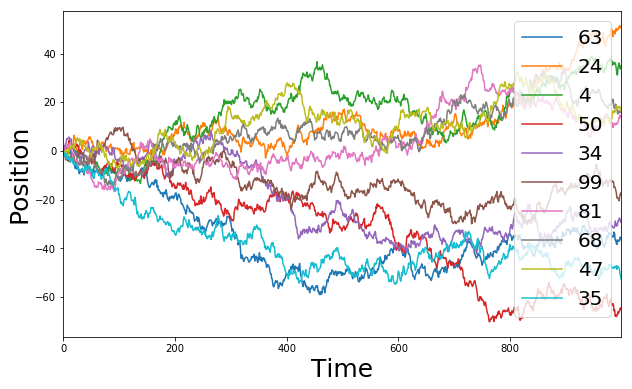

In [4]:
%matplotlib inline
df_sample = df.sample(n=10).transpose().reset_index(drop=True)
df1 = df_sample.plot.line(figsize=(10,6))
df1.plot(fontsize=20)
df1.set_xlabel("Time", fontsize=25)
df1.set_ylabel('Position', fontsize=25)
df1.legend(fontsize=20, loc="upper right")

Essentially, what we have so far is what we need. However, in order to satisfy the equation $ x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T} $, we must multiply our stochastic "noise" ( $ N_{T} $ ) by the E-M constant $ \sqrt{2K\Delta T} $. ( Where we are assuming $K=1$)

The following code accomplishes this. We create an initial data frame of 100 particles at 1000 points in time, each with a random standard normally distributed value. We then multiply each of these values by the E-M constant, and the use the cumsum function to cumulatively sum up the "noise" up to each point to generate the position of each particle at each point in time.

- ### Create a data frame with stochastic paths (include E-M constant)

In [5]:
def run_simulation(num_particle, max_time, K, deltaT):
    # Create initial data frame
    initial = pd.DataFrame(index = range(num_particle),
                           columns = ["T_" + str(i) for i in range(max_time)],
                           data = np.random.normal(0,1, size =(num_particle, max_time)))
    # Set Column One = 0, multiply whole frame by E-M Constant, get cumulative sum, return
    initial['T_0'] = 0; EMConst = np.sqrt(2*K)
    final = ( initial * EMConst ).cumsum(axis=1)
    return final
    raise NotImplementedError

    
diffusion_filled_df = run_simulation(100, 1000, 2, 1)
diffusion_filled_df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,0.040772,2.220512,4.764293,4.316853,7.278070,3.945382,6.744633,7.072461,6.863765,...,-35.321885,-34.350387,-35.086690,-34.440814,-35.383118,-34.627834,-35.457673,-34.531810,-34.375159,-33.897070
1,0.0,-2.995651,-6.455903,-3.527933,-1.402873,-2.119736,-2.852135,-2.102472,-2.155602,-2.843619,...,80.005928,76.648519,76.712675,75.199685,77.053059,76.656173,76.385797,73.612548,75.918089,76.735708
2,0.0,-0.858531,0.394529,0.815472,-0.949309,-0.890318,-0.342808,-2.106530,-0.131277,-0.659484,...,188.685086,191.842401,189.496077,191.228125,191.772677,194.998159,194.873656,193.704012,194.520615,194.339748
3,0.0,3.770419,4.027527,1.788291,4.123510,5.986106,5.690900,6.250388,7.045069,9.415806,...,98.200975,94.369422,93.840291,94.548407,93.665500,91.512815,96.110646,93.454464,92.131261,93.800568
4,0.0,-2.840021,0.396250,-1.638196,0.227364,0.581455,1.678308,1.482955,2.226441,3.026751,...,26.985784,26.297056,24.121596,21.990510,19.802143,21.795891,23.199423,20.630411,18.431352,18.602680
5,0.0,1.570125,1.137631,2.701415,2.433248,4.512725,3.010110,3.852941,4.365342,4.827670,...,39.128520,39.182228,43.343240,43.970733,42.260135,46.605262,45.320513,45.521400,45.652939,43.586205
6,0.0,-2.355555,-3.908545,-5.309665,-3.235620,0.481226,-0.365784,-3.653964,-2.588959,0.349584,...,-75.949356,-76.354895,-73.780039,-73.598721,-73.375977,-77.237808,-77.921432,-79.922337,-77.755634,-80.261151
7,0.0,-3.324178,-5.736149,-9.281087,-10.169394,-8.287529,-8.156563,-7.518061,-10.177821,-8.883156,...,-14.254913,-14.529652,-11.866671,-11.119028,-10.300393,-10.739569,-9.595617,-10.916671,-13.934972,-15.703515
8,0.0,1.056094,-0.131949,-2.309295,-3.968642,-1.483304,-2.460547,-2.120558,-3.008107,-5.272590,...,41.414380,40.279320,40.998284,43.105123,44.392525,45.114212,45.254592,48.557583,49.308257,48.297970
9,0.0,-0.334606,-1.809059,-0.690653,-0.041397,-0.940387,-1.016999,-3.577753,-3.918322,-2.794582,...,6.521321,8.526779,10.185330,11.780195,11.781650,10.527575,12.363337,11.774199,11.508861,12.758296


Note that the particle positions at the final time T_999 vary greatly and appear to be random. We will use and analyze this dataframe of simulated particle positions at varying times, 'diffusion_filled_df', for the rest of this project.

## Dispersion
Let's look at the dispersion $\langle \Vert \mathbf{r}(t)\Vert^2\rangle$ of these particles. Intuitively, as time passes, we would expect to see these particles more dispersed. In our simulation, we will first square each element in 'diffusion_filled_df', and then, per column, find the mean of the values for all particles. This will give us our simulated dispersion at time(t). We also collect the standard deviation. Finally, we graph the values for dispersion against time, to see how dispersion changes over time.
- ### Create a dataframe `dispersion_df` by squaring the elements

In [6]:
dispersion_df = diffusion_filled_df.pow(2)
dispersion_df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,0.001662,4.930676,22.698489,18.635220,52.970302,15.566041,45.490079,50.019703,47.111272,...,1247.635584,1179.949055,1231.075793,1186.169680,1251.965063,1199.086876,1257.246592,1192.445916,1181.651543,1149.011325
1,0.0,8.973928,41.678685,12.446310,1.968053,4.493281,8.134673,4.420389,4.646619,8.086171,...,6400.948574,5874.995537,5884.834496,5654.992670,5937.173881,5876.168912,5834.789953,5418.807238,5763.556217,5888.368880
2,0.0,0.737075,0.155653,0.664995,0.901187,0.792666,0.117517,4.437469,0.017234,0.434919,...,35602.061586,36803.506725,35908.763219,36568.195722,36776.759767,38024.281851,37975.741754,37521.244384,37838.269734,37767.937573
3,0.0,14.216059,16.220973,3.197985,17.003331,35.833464,32.386338,39.067350,49.633003,88.657396,...,9643.431433,8905.587824,8806.000307,8939.401229,8773.225831,8374.595301,9237.256213,8733.736902,8488.169337,8798.546588
4,0.0,8.065721,0.157014,2.683685,0.051694,0.338090,2.816718,2.199155,4.957041,9.161221,...,728.232555,691.535144,581.851377,483.582510,392.124880,475.060859,538.213206,425.613859,339.714754,346.059695
5,0.0,2.465292,1.294204,7.297641,5.920698,20.364691,9.060760,14.845154,19.056213,23.306401,...,1531.041088,1535.246995,1878.636431,1933.425352,1785.919024,2172.050429,2053.948932,2072.197880,2084.190821,1899.757283
6,0.0,5.548640,15.276728,28.192539,10.469239,0.231578,0.133798,13.351451,6.702707,0.122209,...,5768.304664,5830.070026,5443.494143,5416.771788,5384.033993,5965.679050,6071.749611,6387.579913,6045.938649,6441.852380
7,0.0,11.050157,32.903408,86.138579,103.416579,68.683140,66.529526,56.521238,103.588050,78.910463,...,203.202548,211.110789,140.817873,123.632790,106.098090,115.338332,92.075857,119.173699,194.183433,246.600375
8,0.0,1.115335,0.017411,5.332843,15.750122,2.200191,6.054291,4.496767,9.048707,27.800210,...,1715.150839,1622.423608,1680.859264,1858.051616,1970.696315,2035.292163,2047.978113,2357.838876,2431.304225,2332.693902
9,0.0,0.111961,3.272694,0.477002,0.001714,0.884328,1.034288,12.800314,15.353247,7.809688,...,42.527626,72.705959,103.740955,138.772989,138.807271,110.829826,152.852110,138.631768,132.453888,162.774116


- ### Compute mean and standard deviation of every column (point in time)

In [7]:
dispersion_avg = dispersion_df.apply(lambda r: pd.Series( {'mean': r.mean(), 'std' : r.std()} )).transpose()
dispersion_avg['mean']

T_0         0.000000
T_1         4.559154
T_2         8.131381
T_3        15.218771
T_4        21.607914
T_5        22.723385
T_6        24.683124
T_7        26.635744
T_8        30.181653
T_9        30.739416
T_10       32.672156
T_11       39.404502
T_12       45.012230
T_13       49.106967
T_14       52.008560
T_15       56.930669
T_16       56.926115
T_17       58.305643
T_18       63.666087
T_19       72.138185
T_20       70.941416
T_21       81.519367
T_22       86.293520
T_23       91.644032
T_24      103.234805
T_25      107.989466
T_26      116.482676
T_27      120.179093
T_28      128.272030
T_29      130.010044
            ...     
T_970    3725.519318
T_971    3764.492839
T_972    3798.965563
T_973    3784.437297
T_974    3767.908744
T_975    3771.906012
T_976    3809.576070
T_977    3826.055007
T_978    3825.003664
T_979    3837.725544
T_980    3832.420649
T_981    3817.992612
T_982    3795.528697
T_983    3764.590401
T_984    3769.421202
T_985    3772.111094
T_986    3753

- ### Create the time array

In [8]:
T = range(dispersion_avg.shape[0])
T

range(0, 1000)

- ### Create/plot errorbar function

The graph below graphs the dispersion of particles at time(t), plus a vertical bar going through each value representing a 95% confidence interval (CI) for the real value. We construct this 95% CI by taking the value of r"$\left\langle \parallel \mathbf{r}(t) \parallel^{2} \right\rangle$, and subtracting and adding 1.96 * $s$ ($s$ being the sample standard deviation) to find the lower and upper endpoints for the CI. Symbolically, this looks like $
\left(\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle - c\frac{S}{\sqrt{n}},\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle + c\frac{S}{\sqrt{n}}\right)
$, where $n$ is the sampe size used and $c$ is 1.96, chosen according to the the 95% significan level for a t-distribution.

In [9]:
from matplotlib.axes import Axes


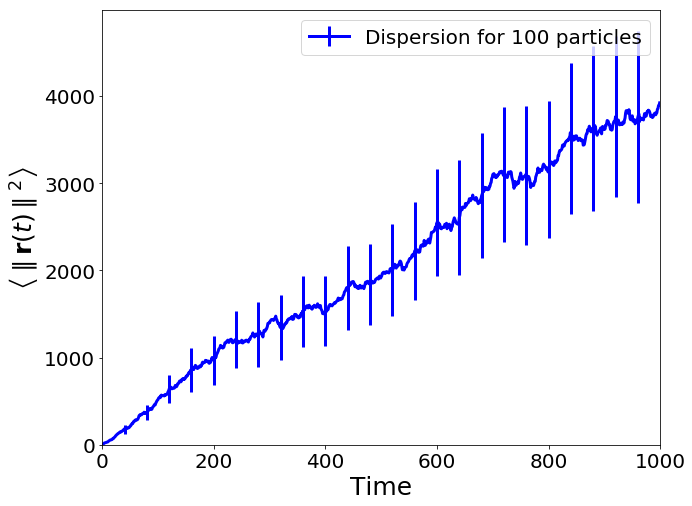

In [10]:
# TODO: Set the size of the figure to [10, 8]
plt.rcParams['figure.figsize']=[10,8]

# TODO: Set the x and y tick label sizes to 20
plt.rc('xtick', labelsize=20); plt.rc('ytick', labelsize=20)

# TODO: plot
from matplotlib.axes import Axes

y_err = 1.96*dispersion_avg['std']/np.sqrt(diffusion_filled_df.shape[0])
plt.errorbar(x=T, y=dispersion_avg['mean'], yerr = y_err, errorevery=40,
             lw=3, color ='blue', label = 'Dispersion')

# TODO: Set the x and y limits
plt.xlim(0,1000); plt.ylim(0, max(dispersion_avg['mean']+y_err))
# TODO: Set the x and y labels
plt.xlabel("Time", fontsize=25); plt.ylabel(r"$\left\langle \parallel \mathbf{r}(t) \parallel^{2} \right\rangle$", fontsize=25)
# TODO: write the legend
plt.legend(["Dispersion for 100 particles"], fontsize =20) 

The above graph shows a clear pattern: As time increases, so does dispersion (it appears the relationship is linear). However, the variance also greatly increases as time passes.

We must keep in mind that this was the case for 100 particles. What happens if we increase the number of particles?

The following code defines a function, "error_graph", that will graph the dispersion of a given number of particles. Essentially, it contains the previous code we used to create, model, and graph disperssion for 100 particles, but places it inside a single function. It returns the disp_avg, diff_filled_df and disp_df as defined above, but for a given amount of particles. Thus, the function both graphs the results of and can create the relevant dataframes for a given n number of particles. In particular, we will be using the n = 100,000 case for the rest of the project.

## Recompute and graph dispersion for n_particles = 100, 1000, 100000

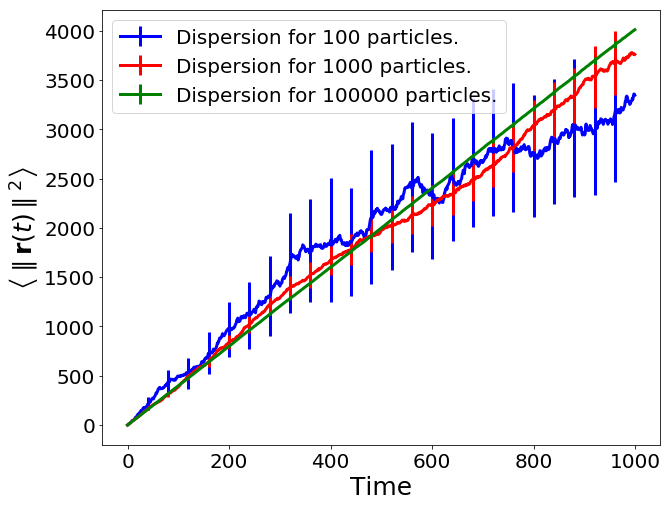

In [11]:
# Create function to create new data for different number of particles,plot error graph
def error_graph(n_particles, color='blue', plot = True):
    diff_filled_df = run_simulation(n_particles, 1000, 2, 1)
    disp_df = diff_filled_df.pow(2)
    disp_avg = disp_df.apply(lambda r: pd.Series( {'mean': r.mean(), 'std' : r.std()} )).transpose()
    
    if plot == True: # Plot above on errorbar, if plot = TRUE
        y_err = 1.96*disp_avg['std']/np.sqrt(diff_filled_df.shape[0])
        plt.errorbar(x=T, y=disp_avg['mean'], yerr = y_err, errorevery=40,
            lw=3, color = color, label = 'Dispersion for '+str(n_particles)+' particles.')
    # Return calculated Dispersion Average, Diffusion Filled DF, Dispersion DF
    return disp_avg, diff_filled_df, disp_df
    
# ERROR GRAPHS
# n=100
error_graph(100, color ='blue')
# n=1000
error_graph(1000, color ='red')
# n=10000
dispersion_avg, diffusion_filled_df, dispersion_df = error_graph(100000, color='green')

# Display plots and legends
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\left\langle \parallel \mathbf{r} (t) \parallel ^{2} \right\rangle$", fontsize=25)
plt.legend(fontsize =20) 

The graph above shows that as the number of particles increases, the relationship between time and dispersions approaches a linear relationship. This is especially apparent for the n = 100000 case (in green), where the CI's appear to become negligible.

In [12]:
from scipy.special import gamma as G

## Verifying the value of "g"
Recall the relationships from earlier:
$$ \ K(r) = Dr^{\alpha}, 0<\alpha <2 $$
and
$$
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
$$
where $\Gamma(x)$ is the gamma function, $\gamma=2-\alpha$, $d=1$, and $\alpha=0$. Thus, we see that

$$ \ K(r) = D$$ 
$$
\langle r^2(t)\rangle \sim g\left(Dt\right), \,\,\,\, g=\frac{4\Gamma\left(\frac{3}{2}\right)}{\Gamma\left(\frac{1}{2}\right)}=4\Gamma\left(1\right)=4
$$ Manipulating these, we get $$ \frac{\langle r^2(t)\rangle}{t} \sim g = 4$$
This relationship should be more obvious for larger values of num_particles. Let's look at the num_particles = 100000 case from earlier to see if $ \frac{\langle r^2(t)\rangle}{t} \sim 4$. First we will define a function, $g$ which takes as arguments $\gamma$ and $d$, and returns $\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}$. Specifically, we will use $\gamma = 2$ and $d = 1$. We will plot values of $ \frac{\langle r^2(t)\rangle}{t}$ for different values of $t$, and see how they compare to the theoretical value of 4.

NOTE: In our code,$ \langle r^2(t)\rangle$ is dispersion_avg['mean] and $t$ is contained in T.

- ### Define function 'g'

In [13]:
def g(gamma, d):
    gee = np.power(gamma,4/gamma) * G((d+2)/gamma) / G(d/gamma)
    return gee
    raise NotImplementedError

- ### Plot T versus dispersion_avg["mean"] / T (add horizontal line for "diffusive regime")

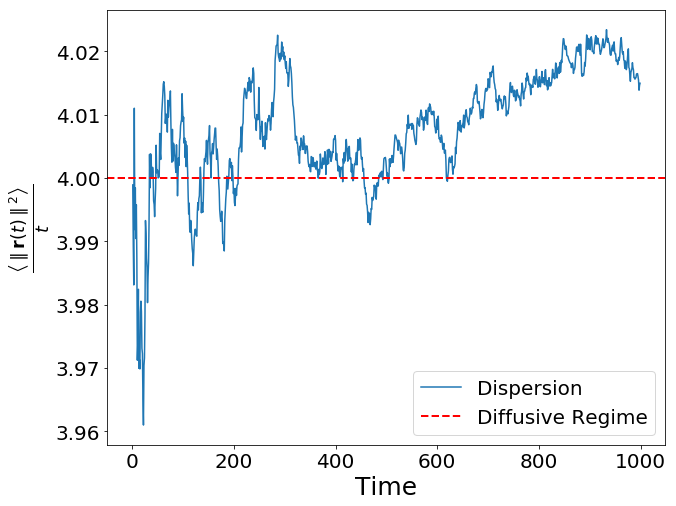

In [14]:
plt.plot(T, dispersion_avg['mean']/T, label ='Dispersion')
plt.axhline(y=g(2, 1)* 2, color='r', lw=2, ls='--', label = 'Diffusive Regime')
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$ \frac{\left\langle \parallel \mathbf{r} (t) \parallel^{2}\right\rangle}{t}$", fontsize=25)
plt.legend(fontsize=20)

As seen above, for $0 < t < 1000$, we get $3.99 < \frac{\langle r^2(t)\rangle}{t} < 4.04$ extremely close to the theoretical value of 4.

## Simulating the probability distribution (pdf)

Recall from earlier that $$ \int_{0}^{\infty}r^{d-1}P(r,t) = 1. $$ This is an implicit definition of our pdf, $ P(r,t) $. We will numerically compute our pdf using our simulated data.

Let $ t^*$ represent an arbitrary but fixed value for $t$. Then $\hat{P}(r_i,t^*)$ (where $\hat{P}$ is the estimated value for $P$) should satisfy

$$
\sum_{i=1}^{M}\hat{P}(r_i,t^*)\Delta r_i = 1
$$
where $M$ is the number of discretized space increments $\Delta r_i$. Therefore we can estimate

$$
\hat{P}(r_i,t^*) = \frac{n}{N\Delta r_i}
$$
where $n$ is the number of samples in the interval $\Delta r_i$ at time $t^*$ and $N$ is the total number of samples.

In the following sections, we use our simulated data to estimate our pdf and compare it to our theoretical results, both graphically and statistically.

- ### Create function to compute simulated pdf

The following function will take as input a df of absolute positions of particles at time T (in our case, diffusion_filled_df['T_999], the last time we have) and a given number of cuts $c$, to return estimated pdf values corresponding to each of $c$ uniformly distributed times in a pre-designated range (in our case, 1000 starting times). Here are the specific steps taken:

- Take a (copy of a) dataframe of absolute positions of particles and bin each absolute position value, according to the number of cuts inputted (num_cuts). Store this as a new column ['cut] in the df.
- Compute $\Delta r$ (deltaR).
- Compute the counts in each bin and divide this count by $\Delta r * N)$, where $N$ is the total number of particles, to normalize these values. These normalized values are our pdf values corresponding to each bin.
- Compute the median position inside each bin, and match it with it's corresponding pdf value.
- Return the pdf values and median values

In [15]:
def compute_prob_distribution(absolute_position, num_cuts):
    absolute_position_copy = absolute_position.copy().to_frame('Position')
    # Cut absolute_position (use qcut and num_cuts)
    absolute_position_copy["cut"], bins = pd.qcut( absolute_position, q=num_cuts, retbins=True )
    
    # Compute deltaR
    deltaR = bins[1:] - bins[:-1]
    
    # Compute the counts per cuts of the column "cut"
    counts = absolute_position_copy.groupby('cut')['cut'].count()
    
    # Normalize the counts to get the probability distribution
    pdf = counts/(deltaR*100000)
    
    # Compute the median per cuts of the absolute position
    r = absolute_position_copy.groupby('cut')['Position'].apply(np.median)
    
    return pdf, r

pdf1, r1 = compute_prob_distribution(diffusion_filled_df["T_999"].abs(), 50)

Now that we have our simulated pdf, let us compare our simulated results to our theoretical results. Recall that $$
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
$$ 
Where $$
A = \left[\frac{\Gamma(\frac{d+2}{\gamma}}{\Gamma\frac{d}{\gamma}}\right]^{\gamma/2}, B = \log\left[\gamma\frac{\Gamma\left(\frac{d+2}{\gamma})\right)^{d/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{(d+2)/2}}\right]
$$

So taking the natural log of both sides, we get
$$
\log\left(P(r,t)\langle r^2(t)\rangle^{d/2}\right) = -A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B
$$

From here, we can see that, for any $\left(r,t\right)$ the right hand side is linear with respect to $\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma$.

## Compare theoretical vs estimated pdf.
What we will do now is compare the estimated pdf with the theoretical pdf. Here are the steps we take:


- Write functions to compute $A$, $B$, and $g\left(Dt\right)^{2/\gamma}$ (This last one is the theoretical limit of $\langle r^{2}(t)\rangle$ )
- Use these functions to compute values from the theoretical pdf: $ P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
$. This is the function pdf(gamma, d, t, D).
- Plot pdf(gamma, d, t, D) against our estimated values for the pdf (pdf1, already created above), with respect to different values of r.
 
(During the preceding steps, we fixed $t = 999$).

- For $t = 199, 399, 599, 799, 999$ , plot $ \log{ \left (P\left(r,t\right){\left\langle r^2\left(t \right)\right\rangle}^{1/2} \right) } $ against $  {\left (\frac{r}{\sqrt{\langle r^2\left(t\right) \rangle} } \right)}^{\gamma} $. We expect a linear relationship between the two.



- ### Write a function that computes A

In [16]:
def A(gamma, d):
    numer = G( (d+2)/gamma )
    denom = G(d/gamma)
    return np.power(numer/denom, gamma/2)
    raise NotImplementedError

- ### Write a function that computes B

In [17]:
def B(gamma, d):
    numer = np.power( G((d+2)/gamma), d/2 )
    denom = np.power( G(1/gamma), (d+2)/2 )
    return np.log( gamma*numer/denom )
    raise NotImplementedError

- ### Write a function that computes the dispersion

In [18]:
def dispersion(gamma, d, t, D):
    return g(gamma,d)*np.power(D*t, 2/gamma)
    raise NotImplementedError

- ### Write a function that computes the theoretical PDF

In [19]:
def pdf(gamma, d, r, t, D):
    # Define variables to use in pdf
    aye = A(gamma,d); bee = B(gamma, d); r_2 = dispersion(gamma, d, t, D)
    exponent= np.exp( -aye*np.power(r/np.sqrt(r_2),gamma) +bee )
    # Return theoretical pdf
    return np.power(r_2, -d/2)*exponent
    raise NotImplementedError

- ### Compute the estimated pdf, use the r array to show the theoretical pdf

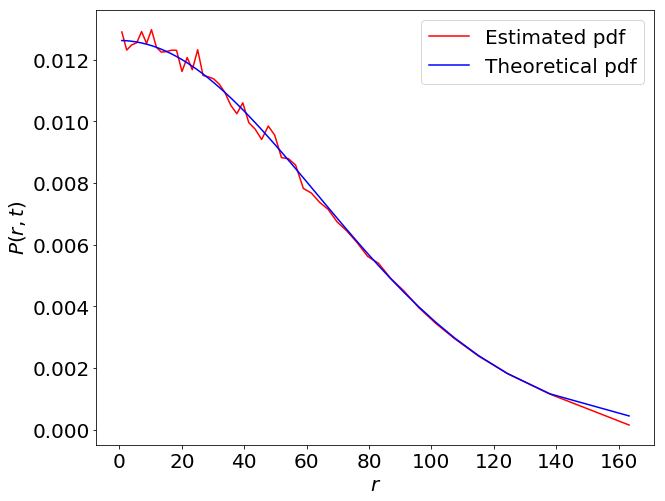

In [20]:
#Estimated pdf: Y is pdf1 (from compute_prob_distribution), X is r1 (from same function)
plt.plot(r1, pdf1, 'r', label = 'Estimated pdf')
#Theoretical pdf: Y is pdf(2, 1, r1, 999, 2), X is r1
plt.plot(r1, pdf(2, 1, r1, 999, 2), 'b', label = 'Theoretical pdf')
plt.xlabel(r"$r$", fontsize=20)
plt.ylabel(r"$P(r,t)$", fontsize=20)
plt.legend(fontsize=20)

The theoretical pdf matches very well the estimated pdf. This is strong evidence for our theoretical pdf being correct.

- ### Plot the rescaled estimated pdf for t = 199, 399, 599, 799, 999

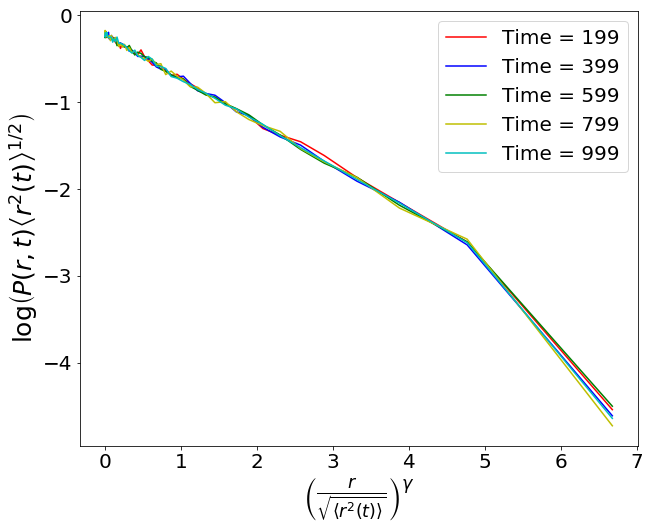

In [21]:
def estim_pdf_scaled(column, t, num_cuts=50, gamma=2, d=1, D=2): #Rescale estimated pdf and r values
    pdf_temp, r_temp =compute_prob_distribution(diffusion_filled_df[column].abs(), num_cuts)
 # Get our transformed r values
    r_scaled= np.power(r_temp/np.sqrt(dispersion(gamma,d,t,D)) , gamma)
 # Get our transformed pdf
    pdf_scaled = np.log( pdf_temp * np.sqrt(dispersion(gamma,d,t,D)))
    return pdf_scaled, r_scaled
#Create pdfs and r's
pdf199, r199 = estim_pdf_scaled('T_199', 199)
pdf399, r399 = estim_pdf_scaled('T_399', 399)
pdf599, r599 = estim_pdf_scaled('T_599', 599)
pdf799, r799 = estim_pdf_scaled('T_799', 799)
pdf999, r999 = estim_pdf_scaled('T_999', 999)

plt.plot(r999, pdf199, 'r', label = 'Time = 199')
plt.plot(r999, pdf399, 'b', label = 'Time = 399')
plt.plot(r999, pdf599, 'g', label = 'Time = 599')
plt.plot(r999, pdf799, 'y', label = 'Time = 799')
plt.plot(r999, pdf999, 'c', label = 'Time = 999')
plt.xlabel( r"$  {\left (\frac{r}{\sqrt{\langle r^2\left(t\right) \rangle} } \right)}^{\gamma} $", fontsize=25 )
plt.ylabel( r"$ \log{ \left (P\left(r,t\right){\left\langle r^2\left(t \right)\right\rangle}^{1/2} \right) } $", fontsize=25)
plt.legend(fontsize=20)

Regardless of our time value, we see the same linear relationship, indicating that the relationship is independent of time. We note that for $  {\left (\frac{r}{\sqrt{\langle r^2\left(t\right) \rangle} } \right)}^{\gamma} > 5 $, there is an odd "bend". This suggerts there is a limit to our theoretical model.

## Test for independence of time

As noted above, the value of time appears independent of the relationship between


$\log{ \left (P\left(r,t\right){\left\langle r^2\left(t \right)\right\rangle}^{1/2} \right) } $ and $  {\left (\frac{r}{\sqrt{\langle r^2\left(t\right) \rangle} } \right)}^{\gamma} $


We test this more rigorously. First we will use a t-test to test for the specific cases of t = 87 and t = 997. Then we will test simultaneously for all time values, using an ANOVA. For both cases, we will use a p-value of .05.

- ### T-test for independence of time

For the t-test:

$$H_{0}: L_{87} = L_{997}$$
$$ H_{1}: L_{87} \neq L_{997} $$

where $L_{t} = \frac{\Vert \mathbf{r}(t)\Vert}{\sqrt{\langle r^2(t)\rangle}}$ . Not rejecting $H_{0}$ would indicate that time is independent.

In [22]:
 from scipy import stats

In [23]:
def t_testing(time1, time2, printout=True):
    num1 = diffusion_filled_df[time1].abs(); denom1 = np.sqrt(dispersion_avg.loc[time1, 'mean'])
    num2=diffusion_filled_df[time2].abs() ; denom2 = np.sqrt(dispersion_avg.loc[time2, 'mean'])
    
    stat, pval = stats.ttest_ind(num1/denom1, num2/denom2)
    if printout==True:
        print("Test statistic = "+str(stat)+", and p-value = "+str(pval)+".")
        if pval <= .05:
            print("p-value <= .05. We conclude that the probability distribution is NOT independent of time.")
        else:
            print("p-value > .05. We conclude that the probability distribution is independent of time!")
    return stat, pval
t_testing('T_87', 'T_997')

Test statistic = 0.678846535507, and p-value = 0.497235890126.
p-value > .05. We conclude that the probability distribution is independent of time!


(0.67884653550709784, 0.49723589012606861)

As the p-value above indicates, for $t =87$ and $t=997$, the pdf is independent of time.

- ### ANOVA for independence of time.

For the ANOVA:

$$H_{0}: L_{a} = L_{b}, \,\, \forall a,b$$

$$ H_{1}: L_{a} \neq L_{b},\,\, \exists a,b $$
where $1 \leq a, b \leq 999$. Again, not rejecting $H_{0}$ indicates that time is independent.

In [24]:
def f_test_all_times(get_values=False):
    stat, pval = stats.f_oneway(*((diffusion_filled_df.values[:,1:]/(dispersion_avg['mean'].values[1:])).T))
    #Stuff to print
    print("Test statistic = "+str(stat)+", and p-value = "+str(pval)+".")
    if pval >= .05:
        print("p-value > .05. We conclude that the probability distribution is independent of time!")
    else: 
        print("p-value <= .05. We conclude that the probability distribution is NOT independent of time.")
    #Do we return test statistic & p-value?
    if get_values:
        return stat, pval

f_test_all_times()

Test statistic = 0.611770859476, and p-value = 1.0.
p-value > .05. We conclude that the probability distribution is independent of time!


Once again, we conclude that the pdf is independent of time.